## 1. 数据字段理解

1. Car_ID：205款车辆的唯一ID（整数型）
2. Symboling：车辆风险评估等级，+3代表风险；-3代表安全（类别型）
3. CarName：车辆名称（类别型）
4. fueltype：燃油类型，汽油或者柴油（类别型）
5. aspiration：进气（类别型）
6. doornumber：车门数（类别型）
7. carbody：车身（类别型）
8. drivewheel：驱动车轮（类别型）
9. enginelocation：引擎位置（类别型）
10. wheelbase：车轴距（数值型）
11. carlength/carwidth/carheight：车身长/宽/高（数值型）
12. curbweight：车身净重（无乘客及行李）（数值型）
13. enginetype：引擎类型（类别型）
14. cylindernumber：汽缸数（类别型）
15. enginesize：引擎尺寸（数值型）
16. fuelsystem：燃油系统（类别型）
17. boreratio：车内径比（数值型）
18. stroke： 引擎体量（数值型）
19. compressionratio：车压缩比（数值型）
20. horsepower：马力（数值型）
21. peakrpm：最大扭矩转速（数值型）
22. citympg：城市里程数（数值型）
23. highwaympg：高速里程数（数值型）
24. price：汽车价格（数值型）

## 2. 原始数据描述性统计分析

In [4]:
import pandas as pd

In [5]:
ori_data = pd.read_csv("./car_price.csv", index_col = 0)

In [6]:
ori_data

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0


In [14]:
# 查看数据的基本情况
print(ori_data.shape)
print("=" * 60)
print(ori_data.info())
print("=" * 60)
print(ori_data.describe())
print("=" * 60)
print(ori_data.columns)

(205, 25)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 1 to 205
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    

### 2.1 类别型变量分布及可视化

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

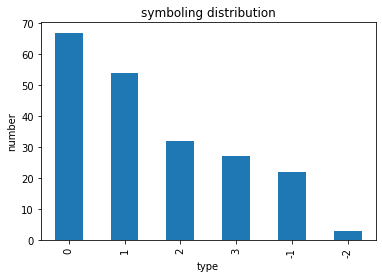

In [39]:
# 风险评估分布情况
print(pd.value_counts(ori_data['symboling'], sort=True))
# 图形化展示
from matplotlib import pyplot as plt
pd.value_counts(ori_data['symboling']).plot(kind = 'bar')
plt.title("symboling distribution")
plt.xlabel("type")
plt.ylabel("number")
plt.show

gas       185
diesel     20
Name: fueltype, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

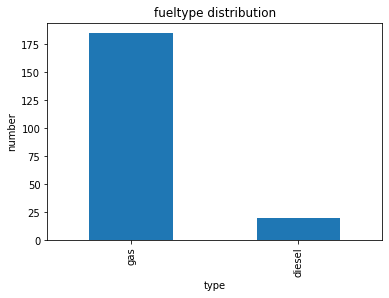

In [26]:
# 燃油类型分布情况
print(pd.value_counts(ori_data['fueltype'], sort=True))
# 图形化展示
from matplotlib import pyplot as plt
pd.value_counts(ori_data['fueltype']).plot(kind = 'bar')
plt.title("fueltype distribution")
plt.xlabel("type")
plt.ylabel("number")
plt.show

std      168
turbo     37
Name: aspiration, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

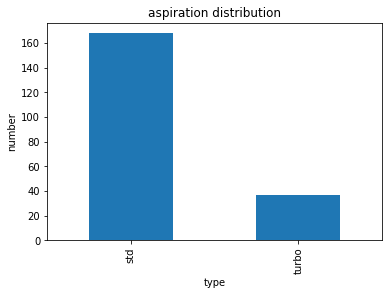

In [27]:
# 进气类型分布情况
print(pd.value_counts(ori_data['aspiration'], sort=True))
# 图形化展示
from matplotlib import pyplot as plt
pd.value_counts(ori_data['aspiration']).plot(kind = 'bar')
plt.title("aspiration distribution")
plt.xlabel("type")
plt.ylabel("number")
plt.show

four    115
two      90
Name: doornumber, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

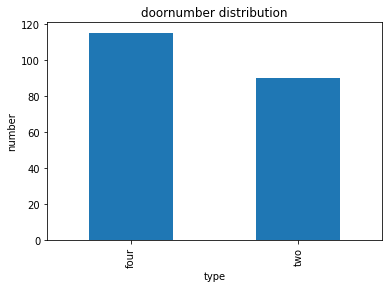

In [28]:
# 门数类型分布情况
print(pd.value_counts(ori_data['doornumber'], sort=True))
# 图形化展示
from matplotlib import pyplot as plt
pd.value_counts(ori_data['doornumber']).plot(kind = 'bar')
plt.title("doornumber distribution")
plt.xlabel("type")
plt.ylabel("number")
plt.show

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

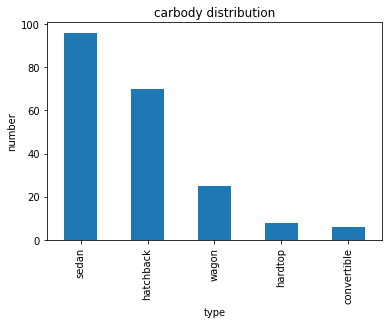

In [29]:
# 车型分布情况
print(pd.value_counts(ori_data['carbody'], sort=True))
# 图形化展示
from matplotlib import pyplot as plt
pd.value_counts(ori_data['carbody']).plot(kind = 'bar')
plt.title("carbody distribution")
plt.xlabel("type")
plt.ylabel("number")
plt.show

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

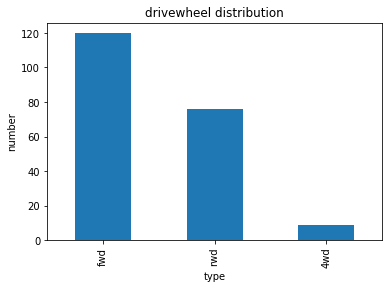

In [30]:
# 驱动车轮分布情况
print(pd.value_counts(ori_data['drivewheel'], sort=True))
# 图形化展示
from matplotlib import pyplot as plt
pd.value_counts(ori_data['drivewheel']).plot(kind = 'bar')
plt.title("drivewheel distribution")
plt.xlabel("type")
plt.ylabel("number")
plt.show

front    202
rear       3
Name: enginelocation, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

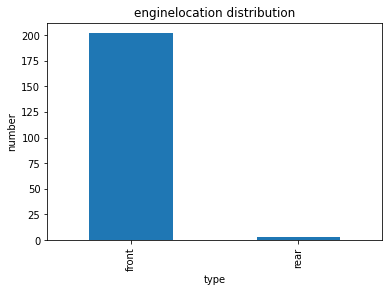

In [31]:
# 引擎位置分布情况
print(pd.value_counts(ori_data['enginelocation'], sort=True))
# 图形化展示
from matplotlib import pyplot as plt
pd.value_counts(ori_data['enginelocation']).plot(kind = 'bar')
plt.title("enginelocation distribution")
plt.xlabel("type")
plt.ylabel("number")
plt.show

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

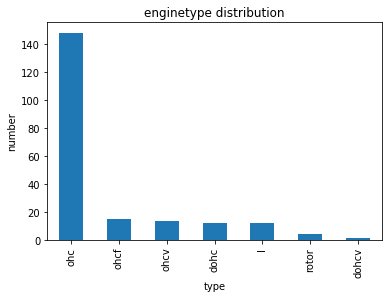

In [32]:
# 引擎类型分布情况
print(pd.value_counts(ori_data['enginetype'], sort=True))
# 图形化展示
from matplotlib import pyplot as plt
pd.value_counts(ori_data['enginetype']).plot(kind = 'bar')
plt.title("enginetype distribution")
plt.xlabel("type")
plt.ylabel("number")
plt.show

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

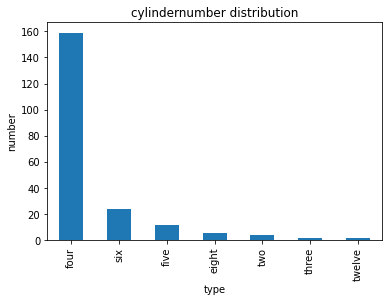

In [33]:
# 引擎类型分布情况
print(pd.value_counts(ori_data['cylindernumber'], sort=True))
# 图形化展示
from matplotlib import pyplot as plt
pd.value_counts(ori_data['cylindernumber']).plot(kind = 'bar')
plt.title("cylindernumber distribution")
plt.xlabel("type")
plt.ylabel("number")
plt.show

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
spfi     1
mfi      1
Name: fuelsystem, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

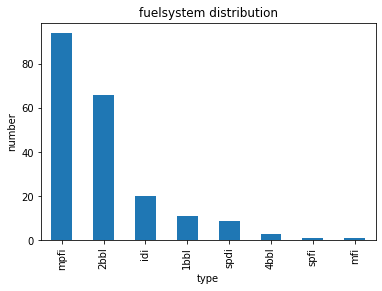

In [34]:
# 燃油系统分布情况
print(pd.value_counts(ori_data['fuelsystem'], sort=True))
# 图形化展示
from matplotlib import pyplot as plt
pd.value_counts(ori_data['fuelsystem']).plot(kind = 'bar')
plt.title("fuelsystem distribution")
plt.xlabel("type")
plt.ylabel("number")
plt.show

### 2.2 数值型变量分布及可视化

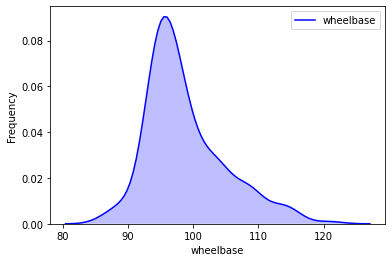

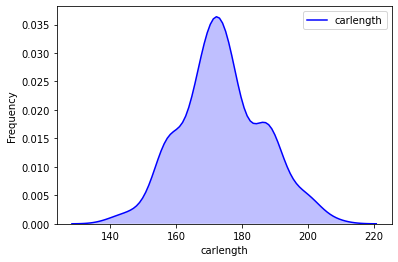

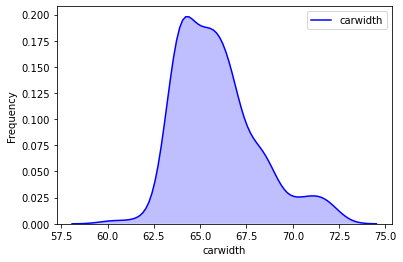

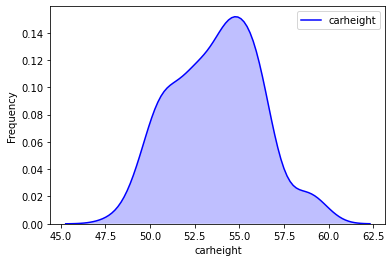

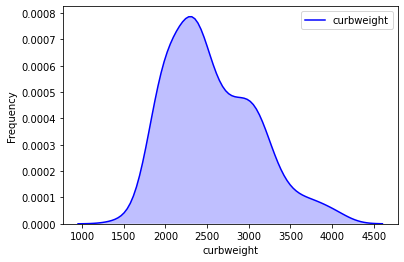

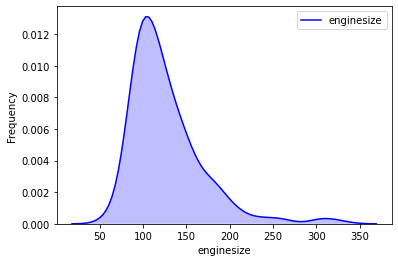

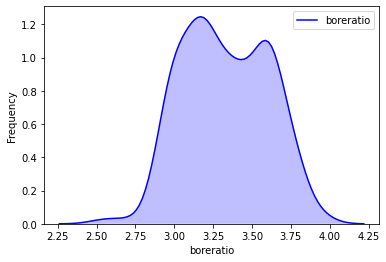

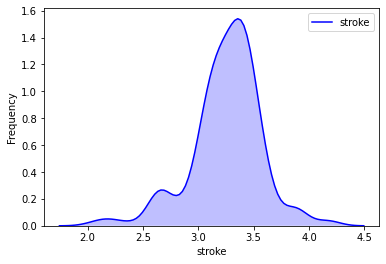

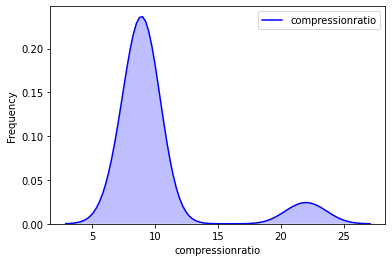

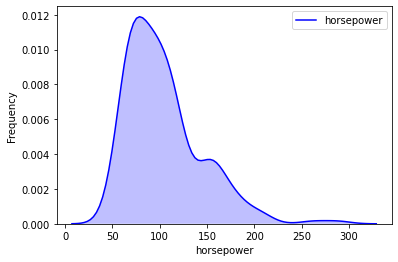

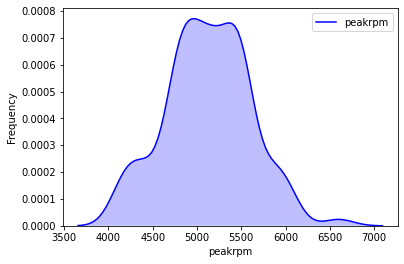

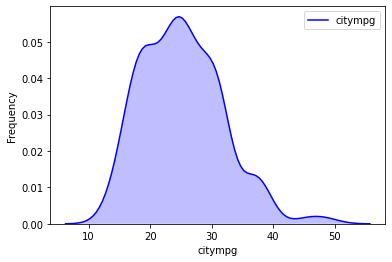

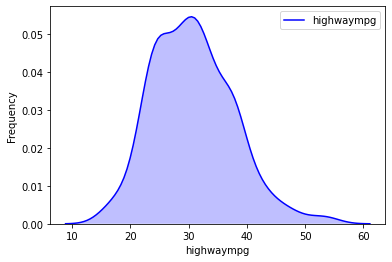

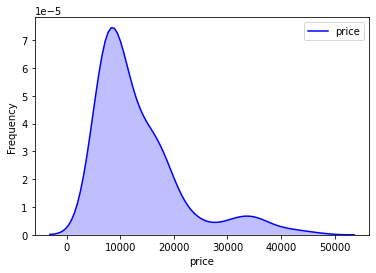

In [36]:
import seaborn as sns
ori_data_columns = ["wheelbase", "carlength", "carwidth", "carheight", "curbweight", "enginesize", "boreratio", "stroke", "compressionratio", "horsepower", "peakrpm", "citympg", "highwaympg", "price"]
for column in ori_data_columns:
        g = sns.kdeplot(ori_data[column], color="Blue", shade = True)
        g.set_xlabel(column)
        g.set_ylabel("Frequency")
        plt.show()

## 3. 特征工程

### 3.1 根据车辆名称生成车辆品牌brand

In [7]:
# 对CarName列进行观察
ori_data['CarName'].value_counts()
# 只取空格前面的品牌名称

toyota corolla         6
toyota corona          6
peugeot 504            6
subaru dl              4
mazda 626              3
                      ..
jaguar xf              1
volvo diesel           1
audi 4000              1
alfa-romero stelvio    1
buick skylark          1
Name: CarName, Length: 147, dtype: int64

In [12]:
ori_data['brand'] = [str(x).split()[0] for x in ori_data.loc[:, 'CarName']]

In [14]:
ori_data['brand'].value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
volvo          11
peugeot        11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         4
isuzu           4
alfa-romero     3
chevrolet       3
jaguar          3
renault         2
maxda           2
vw              2
porcshce        1
toyouta         1
mercury         1
vokswagen       1
Nissan          1
Name: brand, dtype: int64

In [27]:
# 对brand中的脏数据进行清洗
ori_data.loc[182, 'brand'] = 'toyota'

In [36]:
ori_data.loc[190, 'brand'] = 'volkswagen'
ori_data.loc[191, 'brand'] = 'volkswagen'
ori_data.loc[183, 'brand'] = 'volkswagen'
ori_data.loc[51, 'brand'] = 'mazda'
ori_data.loc[52, 'brand'] = 'mazda'
ori_data.loc[127, 'brand'] = 'porsche'
ori_data.loc[90, 'brand'] = 'nissan'

In [37]:
ori_data['brand'].value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
subaru         12
volkswagen     12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
plymouth        7
audi            7
saab            6
porsche         5
isuzu           4
alfa-romero     3
jaguar          3
chevrolet       3
renault         2
mercury         1
Name: brand, dtype: int64

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
subaru         12
volkswagen     12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
plymouth        7
audi            7
saab            6
porsche         5
isuzu           4
alfa-romero     3
jaguar          3
chevrolet       3
renault         2
mercury         1
Name: brand, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

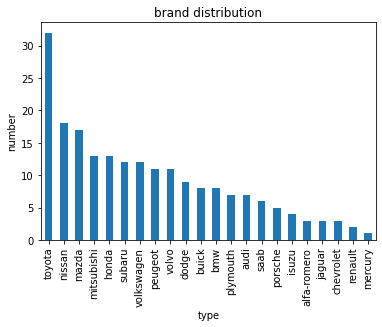

In [40]:
# 品牌分布情况
print(pd.value_counts(ori_data['brand'], sort=True))
# 图形化展示
from matplotlib import pyplot as plt
pd.value_counts(ori_data['brand']).plot(kind = 'bar')
plt.title("brand distribution")
plt.xlabel("type")
plt.ylabel("number")
plt.show

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('0601.csv')
data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo


### 3.2 查看数值型变量间的相关性

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data_num = data.drop(columns = ['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem', 'car_ID', 'CarName', 'brand'])
data_num

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


In [7]:
# 计算数值型变量间的相关性
corr = data_num.corr()

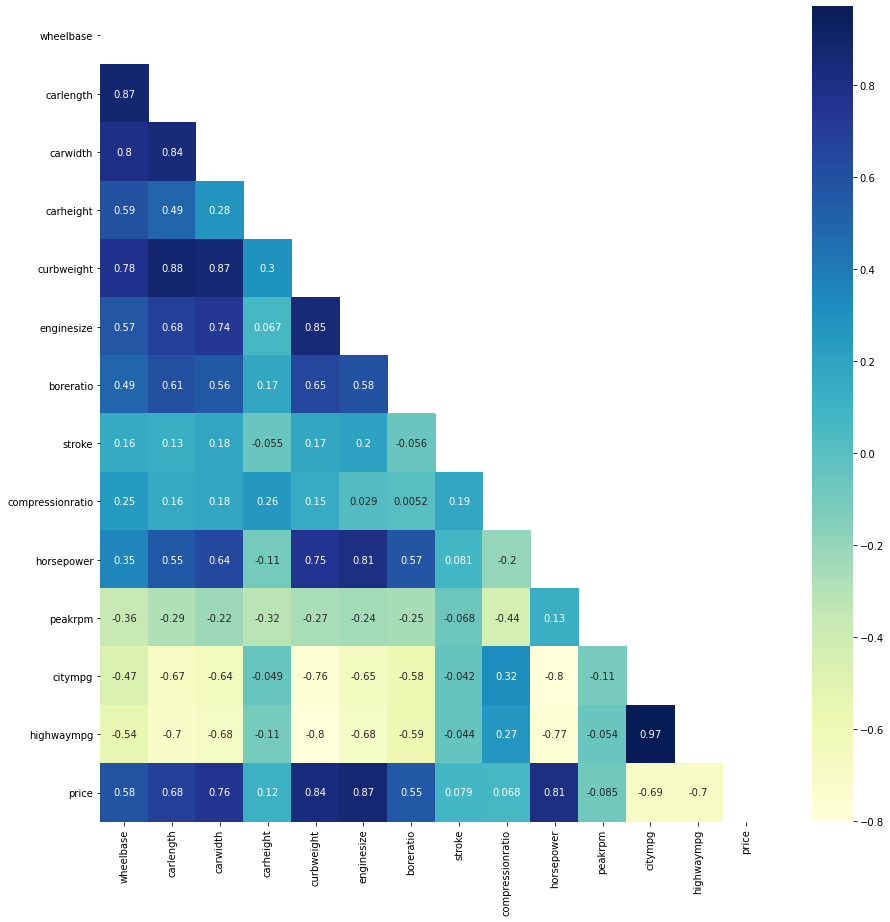

In [21]:
# 相关性可视化
plt.figure(figsize = (15,15))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,annot=True, mask=mask, cmap="YlGnBu")
plt.show()

1. 多个数值型变量之间存在相关关系，如：城市mpg和高速mpg之间存在高度相关关系、引擎大小和马力之间存在高度相关关系等。
2. 拟采用的二阶段聚类法要求数值型变量之间相互独立，因此需要对数值型变量进行进一步处理。

### 3.3 高相关性数值型变量的处理

1. highwaympg和citympg呈高度正相关。其实不管是高速mpg还是城市mpg，其本质都是mpg指标，而且通过观察数据，二者之间的差异较小（极值、均值），因此考虑将二者合并为一个指标'mpg'，计算方式为取二者均值：mpg=(highwaympg+citympg)/2
2. price变量与其余变量产生高相关性的频数最多，可能是因为车辆自身属性和配置的变动会直接影响着车辆的市场价格。此外，与其他变量相比，price属性属于车辆的市场销售属性（而非车辆自身属性），在聚类中更适合作为类别型变量，对车辆的价位进行划分，因此，考虑将price变量转换为类别型变量，按照其价格分布划分为Low price, medium price, high price三类。
3. 对于其他车辆自身属性变量，考虑采用因子分析进行降维（主成分分析无法解释主成分的现实含义，不利于最终聚类结果的解读，因此选用因子分析），以使数值型变量之间相互独立。

In [4]:
# mpg特征生成
data['mpg'] = (data['highwaympg'] + data['citympg'])/2

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand,mpg
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,24.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,24.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,22.5
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,27.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo,25.5
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo,22.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo,20.5
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo,26.5


In [7]:
data.drop(columns=['highwaympg', 'citympg'], inplace=True)

In [8]:
# price变量分组，转化为类别型变量
# 按照price变量的数据描述及分布，设置：10000以下为低价位车；10000-20000为中等价位车；20000以上为高价位车
data.to_csv('./0601.csv')

In [3]:
import pandas as pd
data = pd.read_csv("./0601.csv")
data.drop(columns='Unnamed: 0', inplace=True)
data.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,price,brand,mpg
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,13495.0,alfa-romero,24.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,16500.0,alfa-romero,24.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,16500.0,alfa-romero,22.5
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,13950.0,audi,27.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,17450.0,audi,20.0


In [4]:
data['price_range'] = pd.cut(data['price'], [0, 10000, 20000, 50000], labels=['low_price', 'medium_price', 'high_price'])

In [7]:
data.drop(columns=['price'], inplace=True)

In [8]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,brand,mpg,price_range
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,alfa-romero,24.0,medium_price
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,alfa-romero,24.0,medium_price
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,alfa-romero,22.5,medium_price
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,audi,27.0,medium_price
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,audi,20.0,medium_price


In [10]:
data.to_csv('./0601.csv', index=False)

### 3.4 数值型变量因子分析（SPSS实现）

In [1]:
import pandas as pd
data = pd.read_csv('./0601.csv')
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,brand,mpg,price_range
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,alfa-romero,24.0,medium_price
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,alfa-romero,24.0,medium_price
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,alfa-romero,22.5,medium_price
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,audi,27.0,medium_price
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,audi,20.0,medium_price


结合之前所做的变量相关性分析与初步因子分析结果，stroke变量与其余变量相关性较低，因子分析对该变量的解释性较差，因此考虑删除该变量

In [2]:
data.drop(columns=['stroke'], inplace=True)

In [3]:
data.to_csv('./0601.csv', index=False)

1. 利用SPSS对11个数值型变量进行因子分析，最终得到两个因子
2. 第一个因子包括：车长、车宽、车净重、引擎尺寸、车轴距、mpg、马力、车内径比。简单将该因子归纳为车辆截面与马力因子
3. 第二个因子包括：车高、峰值转速、车压缩比。简单将该因子归纳为车辆垂面与转速因子

In [1]:
# 将因子分析所得的两个因子加入原数据，删除原数据中参与因子分析的数值型数据，以完成二阶段聚类所要求的变量间相互独立的要求
import pandas as pd
data = pd.read_csv('./after.csv')
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,compressionratio,horsepower,peakrpm,brand,mpg,price_range,FAC1_1,FAC2_1
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,9.0,111,5000,alfa-romero,24.0,medium_price,-0.026966,-1.226695
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,9.0,111,5000,alfa-romero,24.0,medium_price,-0.026966,-1.226695
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,9.0,154,5000,alfa-romero,22.5,medium_price,0.177344,-0.765154
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,10.0,102,5500,audi,27.0,medium_price,-0.094328,-0.129559
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,8.0,115,5500,audi,20.0,medium_price,0.464001,-0.543716


In [4]:
data_new = data_new.drop(columns=["mpg"])

In [5]:
data_new.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,brand,price_range,FAC1_1,FAC2_1
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero,medium_price,-0.026966,-1.226695
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero,medium_price,-0.026966,-1.226695
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,alfa-romero,medium_price,0.177344,-0.765154
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi,audi,medium_price,-0.094328,-0.129559
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi,audi,medium_price,0.464001,-0.543716


In [13]:
data_new = data_new.rename(columns = {'FAC1_1':'section_horsepower', "FAC2_1":'vertical_rpm'})

In [14]:
# 再次检查两数值型变量的相关性
data_num = data_new[['section_horsepower','vertical_rpm']]

In [15]:
corr = data_num.corr()

In [21]:
corr
# 由下表可以看到两个因子之间的相关性非常小，两个因子之间相互独立

,section_horsepower,vertical_rpm
section_horsepower,1.000000e+00,-1.116210e-15
vertical_rpm,-1.116210e-15,1.000000e+00


In [22]:
data_new.to_csv('./after.csv', index=False)

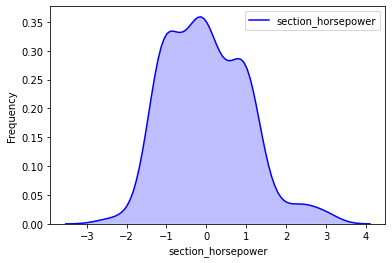

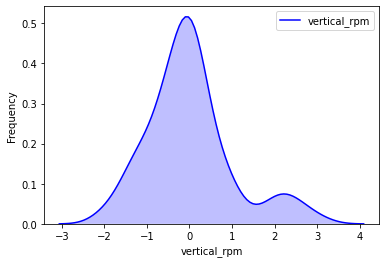

In [24]:
# 两个因子的分布情况
import seaborn as sns
ori_data_columns = ["section_horsepower", "vertical_rpm"]
for column in ori_data_columns:
        g = sns.kdeplot(data_new[column], color="Blue", shade = True)
        g.set_xlabel(column)
        g.set_ylabel("Frequency")
        plt.show()

## 4. 两阶段聚类（SPSS实现）

1. 两阶段聚类适用于数据中即包含分类变量又包含数值型变量的情况。
2. 两阶段聚类要求数值型变量间相互独立（之前的因子分析已经实现了两个因子间的相互独立）且服从正态分布。
3. 利用SPSS对处理后的数据进行二阶段分类，最终将数据中的车辆分为两类，两种类别之间在驱动类型、燃油系统、车辆截面数据与马力、车辆价位四个特征上具有明显的区分。

In [2]:
import pandas as pd
final_data = pd.read_csv('./final.csv')
final_data.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,brand,price_range,section_horsepower,vertical_rpm,claster
0,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero,medium_price,-0.026966,-1.226695,2
1,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero,medium_price,-0.026966,-1.226695,2
2,1,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,alfa-romero,medium_price,0.177344,-0.765154,2
3,2,gas,std,four,sedan,fwd,front,ohc,four,mpfi,audi,medium_price,-0.094328,-0.129559,1
4,2,gas,std,four,sedan,4wd,front,ohc,five,mpfi,audi,medium_price,0.464001,-0.543716,1


## 5. 聚类结果

### 5.1 第一类:经济款
**类别特征**
1. 驱动：车辆的驱动主要为fwd(前轮驱动)，前轮传递动力，经济型车辆大多数为fwd；
2. 燃油系统：车辆的燃油系统主要为2bbl（双腔燃油系统）；
3. 车长/宽/净重/马力：车长/宽/净重/马力数值均小于类2，可以理解为车辆舒适度及马力次于类2；
4. 价格区间：价格集中在10000以下及10000-20000的中低价位

**品牌分布**

In [5]:
data1 = final_data[final_data['claster'] == 1]
data1.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,brand,price_range,section_horsepower,vertical_rpm,claster
3,2,gas,std,four,sedan,fwd,front,ohc,four,mpfi,audi,medium_price,-0.094328,-0.129559,1
4,2,gas,std,four,sedan,4wd,front,ohc,five,mpfi,audi,medium_price,0.464001,-0.543716,1
5,2,gas,std,two,sedan,fwd,front,ohc,five,mpfi,audi,medium_price,0.297462,-0.581580,1
6,1,gas,std,four,sedan,fwd,front,ohc,five,mpfi,audi,medium_price,0.942390,0.277982,1
7,1,gas,std,four,wagon,fwd,front,ohc,five,mpfi,audi,medium_price,0.975558,0.286303,1


toyota        17
mitsubishi    13
honda         13
subaru        12
nissan        11
mazda         10
dodge          9
volkswagen     8
plymouth       7
saab           6
audi           6
chevrolet      3
isuzu          3
renault        2
Name: brand, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

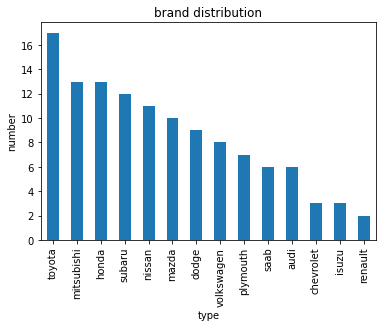

In [9]:
print(pd.value_counts(data1['brand'], sort=True))
# 图形化展示
from matplotlib import pyplot as plt
pd.value_counts(data1['brand']).plot(kind = 'bar')
plt.title("brand distribution")
plt.xlabel("type")
plt.ylabel("number")
plt.show

**根据品牌分布可知，经济款类别中主要包括的品牌有：丰田、本田、斯巴鲁、尼桑、马自达、道奇等**

### 5.2 第二类:豪华款
**类别特征**
1. 驱动：车辆的驱动主要为rwd(后轮驱动)，后轮传递动力，车辆加速时中心向后偏移，实现更加平稳的驾驶；
2. 燃油系统：车辆的燃油系统主要为mpfi（多点燃油系统）；
3. 车长/宽/净重/马力：车长/宽/净重/马力数值均大于类1，可以理解为车辆舒适度及马力优于类1；
4. 价格区间：价格集中在20000及以上的的中高价位

**品牌分布**

In [10]:
data2 = final_data[final_data['claster'] == 2]
data2.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,brand,price_range,section_horsepower,vertical_rpm,claster
0,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero,medium_price,-0.026966,-1.226695,2
1,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero,medium_price,-0.026966,-1.226695,2
2,1,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,alfa-romero,medium_price,0.177344,-0.765154,2
8,1,gas,turbo,four,sedan,fwd,front,ohc,five,mpfi,audi,high_price,1.213420,0.062321,2
10,2,gas,std,two,sedan,rwd,front,ohc,four,mpfi,bmw,medium_price,0.071387,-0.444693,2


toyota         15
volvo          11
peugeot        11
buick           8
bmw             8
mazda           7
nissan          7
porsche         5
volkswagen      4
jaguar          3
alfa-romero     3
mercury         1
audi            1
isuzu           1
Name: brand, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

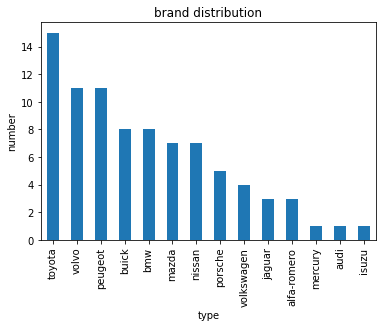

In [12]:
print(pd.value_counts(data2['brand'], sort=True))
# 图形化展示
from matplotlib import pyplot as plt
pd.value_counts(data2['brand']).plot(kind = 'bar')
plt.title("brand distribution")
plt.xlabel("type")
plt.ylabel("number")
plt.show

**根据品牌分布可知，豪华款类别中主要包括的品牌有：丰田（本田的高端车型）、沃尔沃、标致、别克、宝马、保时捷、阿尔法等，高端车（宝马、保时捷）品牌和跑车品牌（阿尔法）居多。**